# Module 4: Calculus & Differential Equations

---

## Motivation
Rarely are systems in the world static. E.g. ........

We want to study how things change over time -- dynamical systems
- neuron membrane potential
- drift diffusion model

Calculus & diff eq provide useful tools to do this


---
# Day 2: Differential equations
Just like the section for calculus, this section of differential equations will be grossly oversimplified. In fact, I'm of the opinion that we'll be throwing out even more of the content you might learn in a formal differential equations class than you would a formal calculus class. This is because we'll be focusing mainly on methods of numerically solving ordinary differential equations and not all the additional tricks beyond simple antidifferentiation to get analytical solutions.

---

## 1. Introduction to differential equations
According to Abell & Braselton in *Introductory Differential Equations with Boundary Value Problems, 3rd ed.*, a **differential equation** is one that "contains the derivative or differentials of one or more dependent variables with respect to one or more dependent variables". In simpler terms, it is an equation that relates some function to its derivative. We've already been exposed to differential equations in the calculus section. Recall our example function $y = t^2$; the analytical derivative of this function, $\frac{dy}{dt} = 2t$, is considered a differential equation. 

Differential equations in neuroscience, as well as in other fields, are used to model how systems change over time or with respect to other parameters. One of the most well-known sets of differential equations in neuroscience is the *Hodgkin-Huxley model*, which describes the membrane potential dynamics of the squid giant axon. The solution of this model is used to demonstrate the initiation and propagation of action potentials under various initial conditions. Differential equations can also by used to model behavioral phenomena; a notable example is a model of evidence accumulation, known as the *drift-diffusion model*, whose solution describes how behavioral evidence is accumulated over time to lead to a left-wards or right-wards choice. This model has been used in various labs in the department (see Carlos Brody's, Ilana Witten's, and David Tank's labs as an example) to describe behavior in working memory tasks such as the Poisson Clicks task and the Towers VR task. 

In the remainer of this section, we're going to cover a few of the most basic elements of differential equations using simple models and equations. In the next section we'll apply some of these tools to a simplified version of the Hodgkin-Huxley model to get an idea of how they can be used in practice.

### Some vocabulary
The differential equations addressed in this notebook are all what is referred to as ***first-order ordinary differential equations***. *First-order* means that the highest order differential in the equation is of the first order, i.e. a first-order derivative. *Ordinary differential equation* refers to a differential equation that depends on only *one* independent variable. This is the simplest type of differential equation you will encounter, and it sufficient to introduce some of the basic concepts of differential equations. In the remainder of this section, you can assume that any time I use the term *differential equation*, I'm referring to *first-order ordinary differential equations*.

### Separation of variables
First, I want to introduce the simplest method for analytically solving differential equations, which should connect back to things we learned in the calculus section. Let's return to the differential equation we encountered in the calculus section: $\frac{dy}{dt} = 2t$. This represents one of the simplest types of differential equations where the left-hand side only depends on the independent variable, $t$. Oftentimes, however, differential equations can also be defined in terms of their dependent variables. You may be familiar with a common differential equation, that of exponential decay, $\frac{dy}{dt} = -ky$, where $k$ is some constant. This time the right-hand function only contains the dependent variable $y$. You may even come across differential equations that are defined in terms of both their dependend and independent variables, e.g. $\frac{dy}{dt} = \frac{t}{y}$.

Finding a function $y$ that satisfies a differential equation is considered a *solution* to that differential equation. For $\frac{dy}{dt} = 2t$, it might seem obvious that $y = t^2$ is a solution to this differential equation, since this is what was differentiated to compute it. This can be easily verified by plugging in $t^2$ for $y$ in the differential equation:

$$
\begin{aligned}
\frac{dy}{dt} &= 2t \\ 
\frac{d}{dt}t^2 &= 2t \\
2t &= 2t 
\end{aligned}
$$

But what if we didn't first differentiate $y$? And how would we find a solution to a differential equation that is also a function of $y$? Luckily, all three examples of differential equations above can be solved in the same way: through simple antidifferentiation via *separation of variables*. Let's start with $\frac{dy}{dt} = 2t$. In order to get a solution for this differential equation, we need to integrate (context: *indefinite* integration) both sides of the equation:

$$\int \frac{dy}{dt} = \int 2t$$

However, there's something wrong with the form of the above expression: the right side doesn't have a differential, and the left side has a differential in the denominator, neither of which are conducive to integration. This is where part one of the *separation* of variables occurs: we can treat $\frac{dy}{dt}$ as a fraction and multiply both sides by $dt$ to get

$$\int dy = \int 2t dt$$

Now, both sides of the equation can be integrated to get

$$ y = t^2 + C $$

Note that the constant $C$ is added through the process of indefinite integration, such that this is the *general* solution to the differential equation $\frac{dy}{dt} = 2t$.
> **Note:** Theoretically, integrating the left-hand side should also include a constant; however, it can be assumed that it is absorbed by the constant on the right-hand side.

How can we apply this to our second example,  $\frac{dy}{dt} = -ky$? Let's start by setting up our integrals and getting the differentials on their appropriate sides:

$$\int dy = \int -kydt$$

You may notice a new issue with the above expression: you can't integrate the right-hand side with respect to $t$ because our function, $-ky$, has no $t$s to be found. We also can't treat $y$ as a constant because we know that it depends on $t$ -- that's how we got this differential equation in the first place. Now comes part two of the separation of variables: all we have to do is move $y$ to the side that has the differential $dy$.

$$\int \frac{1}{y}dy = \int -kdt$$

Now the above expression is solvable. Using our table of integrals, we get

$$\ln y = -kt + C$$

We're not quite done yet; we need $y$ by itself for this to comprise the solution. Using inverse operations, we get the following:

$$y = C\exp^{-kt}$$

>**Note:** You may be wondering why I wrote the solution in this form and not $y = \exp^{-kt + C}$. Using properties of exponentials, we know that $\exp^{-kt+C} = \exp^{-kt}\exp^C$. Since $\exp^C$ is also a constant, and since the value $C$ is arbitrary, I simply replaced $\exp^C$ with $C$ because it signifies the same thing, that it is an arbitrary constant, and provides a "cleaner" solution.

Now it should be clear why the original differential equation is referred as one of *exponential decay*. Plugging this solution into the differential equation should verify that it is indeed a solution.

The principles demonstrated above can be applied to our final example, $\frac{dy}{dt} = \frac{t}{y}$, to obtain a solution. We'll use separation of variables to get the differentials on there appropriate side, while making sure that all $y$s go to the left side and all $t$s stay on the right side.

$$ 
\begin{align}
\int y dy &= \int t dt \\
\frac{y^2}{2} &= \frac{t^2}{2} + C \\
y &= t+C
\end{align}
$$

All of the solutions above are *general* solutions to the differential equations. To get a specific solution, you'll need to be given some initial condition, e.g. $y(0) = 0$, which you can use to solve for the value of $C$. This is referred to as an **initial value problem** or IVP.

In summary, Separation of variables works for any differential equation that can be written in the form:

$$\boxed{ g(y)dy = f(t)dt }$$

How do we find analytical solutions for differential equations that *can't* be written in this form? In the context of this workshop: you don't. We can numerically approximate everything else, which we will learn how to do later on.

### Slope fields
Let's move onto something more tangible: slope fields. Slope fields are a way to visualize differential equations as well as solutions to them. They're useful in situations where the differential equation cannot easily be solved, yet insights into the behavior of its solutions are desired. Let's return to our familiar example $\frac{dy}{dt} = 2t$. $\frac{dy}{dt}$ can be thought of as a *slope* that can be computed for every $(t,y)$ pair.

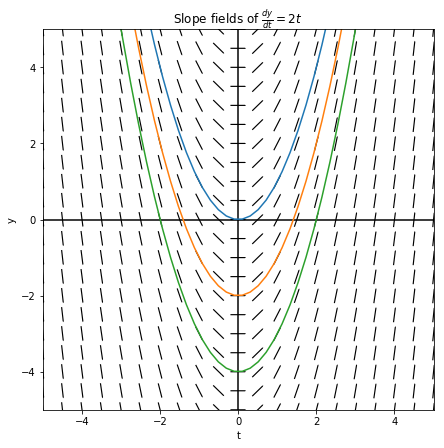

In [163]:
# populate points to compute slopes
t = np.linspace(-5,5,21)
y = np.linspace(-5,5,21)

def diff(t,y):
    return 2*t

_, ax13 = plt.subplots(figsize=(7,7))

scale = 2.5
for j in t:
    for k in y:
        slope = diff(j,k)
        N = np.sqrt(1**2+slope**2)
        jshift = 1/(scale*N)
        kshift = slope/(scale*N)
        
        ax13.quiver(j-jshift/2,k-kshift/2,jshift,kshift,angles='xy',scale_units='xy',scale=1,width=0.003,headwidth=1,headlength=1)

    
        
t2 = np.linspace(-5,5,50)
ax13.axhline(y=0, color='k')
ax13.axvline(x=0, color='k');
ax13.plot(t2,t2**2)
ax13.plot(t2,t2**2-2);
ax13.plot(t2,t2**2-4);
ax13.axis([-5,5,-5,5]);
ax13.set_title(r"Slope fields of $\frac{dy}{dt}=2t$");
ax13.set_xlabel("t")
ax13.set_ylabel("y");

Plotted above is the slope field of $\frac{dy}{dt} = 2t$. Each line plotted represents the slope of the tangent line to solutions of $\frac{dy}{dt}$ at each point. For non-zero slopes, you can imagine that the line being plotted is the hypotenuse of the triangle with base length $1$ and height $\frac{dy}{dt}$ centered at the point where $\frac{dy}{dt}$ is computed, which are then all normalized to be of equal length. Overlaid are a few solutions to this differential equation: $y = t^2$, $y = t^2-2$, and $y=t^2-4$. It's easy to see how these solutions follow the slope lines; additionally, it would be easy to qualitatively draw out additional solutions using the slope lines.

Slope fields are also a way to visualize an important concept in differential equations: the *existance* and *uniqueness* of solutions. Since differential equations apply to many real-world problems, it's important to know whether solutions exist and whether they are unique to be able to make future predictions about that system. Imagine a population whose dynamics are described by exponential growth, or $\frac{dy}{dt} = 0.5y$. If you know that $y(0) = 200$, is it possible to predict what the population is at $t = 5$? We can quickly answer this question by looking at the slope field.

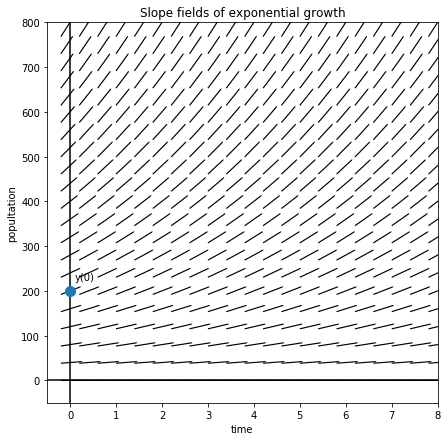

In [166]:
# populate points to compute slopes
t = np.linspace(0,8,21)
y = np.linspace(0,800,21)

def diff(t,y):
    return 0.2*y

_, ax14 = plt.subplots(figsize=(7,7))

scl = 1
for j in t:
    for k in y:
        slope = diff(j,k)
        N = np.sqrt(1**2+slope**2)
        jshift = 1/N
        kshift = slope/N
        
        #ax13.plot([j-jshift/2,j+jshift/2],[k-kshift/2,k+kshift/2],'k')
        ax14.quiver(j-1/5,k-slope/5,1,slope,angles='xy',scale_units='xy',width=0.003,headwidth=1,headlength=1)
        
t2 = np.linspace(-5,5,50)
ax14.axhline(y=0, color='k')
ax14.axvline(x=0, color='k');
ax14.plot(0,200,'.',ms=20)
ax14.text(0.1,225,'y(0)')
ax14.axis([-0.5,8,-50,800]);
ax14.set_title(r"Slope fields of exponential growth");
ax14.set_xlabel("time")
ax14.set_ylabel("popultation");

First, does a solution *exist*? By looking at the initial point, we can see that, yes, there is a slope defined at that point, and we can draw a continous line extending out from it. Second, is the solution *unique*? Also yes: there is only one slope defined at the initial point, and it points in a single direction, meaning there is only one trajectory it can follow. With these conditions satisfied, we can be confident that we can make real, unique predictions about the system. We can even use the slope field to easily estimate what the population might be at $t = 5$ by tracing out the arrows (hint: the answer is 544, were you able to get close?)

### Systems of differential equations and direction fields

Many dynamical system models come in the form of *systems* of differential equations, including the Hodgkin-Huxley model. In its simplest form, this means that we have differentials for at least two dependent variables that change with respect to a single independent variable. While we won't get into how to analytically solve systems of differential equations, it might be useful to demonstrate how to visualize them. Let's start with a simple system:

$$
\left\{
\begin{aligned}
\frac{dx}{dt} &= y \\
\frac{dy}{dt} &= -x
\end{aligned}
\right.
$$

If we were to plot slope fields of the above equation as we did in the previous section, we would have to plot $\frac{dx}{dt}$ and $\frac{dy}{dt}$ separately. This would be useful for visualzing each differential equation separately, but would give us no intuition on how the *system* moves together. To gain insight into the system using slope fields, we would need to transorm the above system into a single equation such that we can plot the two dependent variables together. This can be done by rewriting the system as $\frac{dy}{dx}$, which can be done by dividing the two equations $\frac{dy/dt}{dx/dt}$. Canceling out $dt$, we get

$$
\frac{dy}{dx} = \frac{-x}{y}
$$

which is plotted below on the left.

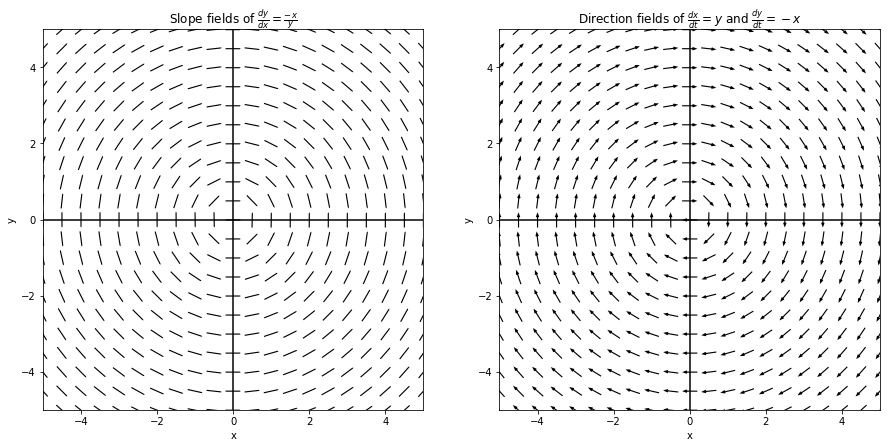

In [162]:
# populate points to compute slopes
x = np.linspace(-5,5,21)
y = np.linspace(-5.01,4.99,21)

def diff(x,y):
    return -x/y

_, (ax15,ax16) = plt.subplots(nrows=1,ncols=2,figsize=(15,7))

scale = 2.5
for j in x:
    for k in y:
        slope = diff(j,k)
        N = np.sqrt(1**2+slope**2)
        jshift = 1/(scale*N)
        kshift = slope/(scale*N)
        
        N2 = np.sqrt(j**2+k**2)
        j2shift = k/(scale*N2)
        k2shift = -j/(scale*N2)
        
        ax15.quiver(j-jshift/2,k-kshift/2,jshift,kshift,angles='xy',scale_units='xy',scale=1,width=0.003,headwidth=1,headlength=1)
        ax16.quiver(j-j2shift/2,k-k2shift/2,j2shift,k2shift,angles='xy',scale_units='xy',scale=1,width=0.003,headwidth=3,headlength=4)
    
t2 = np.linspace(-5,5,50)
ax15.axhline(y=0, color='k')
ax15.axvline(x=0, color='k');
ax15.axis([-5,5,-5,5]);
ax15.set_title(r"Slope fields of $\frac{dy}{dx}=\frac{-x}{y}$");
ax15.set_xlabel("x")
ax15.set_ylabel("y");

ax16.axhline(y=0, color='k')
ax16.axvline(x=0, color='k');
ax16.axis([-5,5,-5,5]);
ax16.set_title(r"Direction fields of $\frac{dx}{dt}= y$ and $\frac{dy}{dt}=-x$");
ax16.set_xlabel("x")
ax16.set_ylabel("y");

The slope field gives a good intuition on how $x$ and $y$ vary with each other, but we lose all information about the independent variable $t$. 

### Numerical solutions

In many situation when analytically solving differential equations is unfeasible, we'll rely on numerical methods to approximate solutions. Even in situations where you *could* analytically solve the differential equation, sometimes it's just easier and faster to use numerical solutions. There are two numerical methods that we'll be covering in this section: *Euler's method* and the *Improved Euler's method*. Both methods are similar, with the latter building upon the former (as can be assumed by its name). Importantly, they are both *iterative* methods, meaning that the approximate value at one step is dependent on the approximate value computed from the previous step. In the realm of programming, this means we'll need to utilyze *for loops* to compute them.

A third notable method is the *Runge-Kutta method*. Since its derivation is a bit more complicated and depends on some calculus not covered above, we won't be covering this method in the workshop. However, if you find yourself itching for some more numerical methods that improve acurracy, I'd encourage you to look into it.

<ins> **Euler's Method** </ins>

The first method we'll cover, *Euler's method*, is the easiest of the three while also being the least accurate. Despite the latter concern, Euler's method is sufficient to use as an approximation in most of the situations you'll encounter in this program; so if there's *one* method to remember, let it be this one.

Euler's method revolves around the fact that a differential equation will give you a slope that is tangent to the solution at any point. Using this slope, you can linearly approximate the distance between some *given* initial point and a later point by using the familiar equation $y = mx + b$. Let's rewrite this age-old equation in terms that are more relevant to some general differential equation, $\frac{dy}{dx} = f(x,y)$ and initial value $y(x_0) = y_0$.

$$
y_1 = f(x_0,y_0)(x_1-x_0) + y_0 = hf(x_0,x_0) + y_0
$$

As you can see, we replaced the slope $m$ with the value of the differential equation at the initial point, $f(t_0,y_0)$, and the y-intercept $b$ was replaced with the initial value of $y=y_0$. The independent variable $x$ was replaced with the distance we want to travel in the x-direction $(x_1-x_0)$ to get the value of $y$ at our final destination $y_1$; this quantity can be replaced by the variable $h$ because we'll want to move a fixed x-distance at each step. After computing $y_1$, we can compute $y_2$ in a similar fashion by replacing $y_0$ and $x_0$ with $y_1$ and $x_1$.

$$
y_2 = hf(x_1,y_1) + y_1
$$

And thus begins our iterative process that can repeat indefinitely until some final point is reached. Euler's method can be summarized by the following iterative equation:

<div class="alert alert-block alert-info">
    <b>Euler's Method:</b> The solution of the IVP 
$$ \frac{dy}{dx} = f(x,y), y(x_0) = y_0 $$
is approximated at the sequences of points $(x_n,y_n)$, $n=1,2,...,N$, wjere $y_n$ is the approximate value of $y(x_n)$ by computing
$$ y_n = hf(x_{n-1},y_{n-1}) + y_{n-1} $$
where $h = \frac{x_N - x_0}{N}$ is the selected stepsize
</div>

Let's visualize this process using our iconic differential equation $\frac{dy}{dt} = 2t$, initial value $y(0) = 2$, and stepsize $h = 0.5$, plotted below in blue.

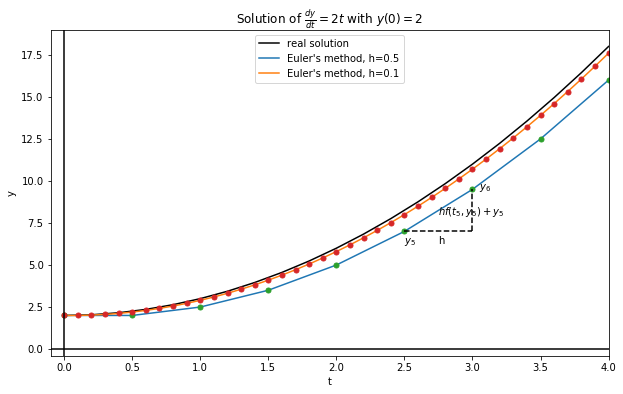

In [246]:
# plot equation f = t^2
t = np.linspace(0,4,21) # populate t
y = t**2 + 2            # populate f(t)

def diff(t,y):
    return 2*t

# plot and add some visualizations
_, ax17 = plt.subplots(figsize=(10,6))
ax17.plot(t,y,'k')
ax17.set_title(r"Solution of $\frac{dy}{dt} = 2t$ with $y(0)=2$")
ax17.set_xlabel('t')
ax17.set_ylabel('y');
ax17.axis([-0.1,4,-0.4,19]);

# Euler's method
h = 0.5
N = int(4/h)+1
t_em = np.arange(0,4.1,h)
y_em = np.zeros_like(t_em)
y_em[0] = 2
for n in np.arange(1,N):
    t_em[n-1]
    y_em[n] = h*diff(t_em[n-1],y_em[n-1]) + y_em[n-1]
    
# Euler's method
h = 0.1
N = int(4/h)+1
t_em2 = np.arange(0,4.1,h)
y_em2 = np.zeros_like(t_em2)
y_em2[0] = 2
for n in np.arange(1,N):
    t_em2[n-1]
    y_em2[n] = h*diff(t_em2[n-1],y_em2[n-1]) + y_em2[n-1]
    
ax17.plot(t_em,y_em)
ax17.plot(t_em2,y_em2)
ax17.plot(t_em,y_em,'.',ms=10);
ax17.plot(t_em2,y_em2,'.',ms=10);
ax17.axhline(y=0, color='k')
ax17.axvline(x=0, color='k');
ax17.plot([2.5,3],[y_em[5],y_em[5]],'--k')
ax17.plot([3,3],[y_em[5],y_em[6]],'--k')
ax17.text(2.75,6.25,'h')
ax17.text(3.05,9.5,r'$y_6$')
ax17.text(2.5,6.25,r'$y_5$')
ax17.text(2.75,8,r'$hf(t_5,y_5)+y_5$')
ax17.legend(("real solution","Euler\'s method, h=0.5","Euler\'s method, h=0.1"));

You can see that our approximation using Euler's method gets pretty close to the real solution, $y=t^2+2$, plotted in black. The green dots represent the points at which we're approximating the solution, one for each iteration of the for loop (excluding the initial point, $(0,2)$). Overlaid are labels to visualize what Euler's method is computing, looking specifically between $y_5$ and $y_6$. The horizontal dashed like is the change in $t$, denoted by $h$, which is the same between every green point. The blue line connecting $y_5$ and $y_6$ is the line computed by Euler's method at step 5, telling us how far from $y_5$ we need to go to get the approximate $y_6$.

Just like our numerical approximations of derivatives and integrals, we can improve our approximation by decreasing the stepsize $h$ (or increasing the number of steps $n$). Plotted in orange is an approximation using $h=0.1$; already it's gotten much closer to the real solution than our original approximation was.

<ins> **Improved Euler's Method** </ins>

Euler's method can be improved by using the average slope between $(x_{n-1},y_{n-1})$ and $(x_n,y_n)$ instead of using solely the slope at $(x_{n_1},y_{n-1})$. This requires computing an intermediate via the original Euler's method $y_n^*$ to calculate the average slope between these points, which is then used to calculate the final $y_n$. The improved Euler's method can be summarize as follows:
<div class="alert alert-block alert-info">
<b>Improved Euler's Method:</b> The solution of the IVP
$$ \frac{dy}{dx} = f(x,y), y(x_0)=y_0$$
is approximated at the sequence of points $(x_n,y_n)$, $n=1,2,...,N$, where $y_n$ is the approximte value of $y(x_n)$ by computing at each step the two calculations:
$$\begin{align}
y_n^* &= hf(x_{n-1},y_{n-1}) + y_{n-1} \\
y_n &= \frac{1}{2}h(f(x_{n-1},y_{n-1})+f(x_n,y_n^*)) + y_{n-1}
\end{align}$$
where $h=\frac{x_N-x_0}{N}$ is the selected stepsize.
</div>

Let's see how the improved Euler's method compares to the original using $\frac{dy}{dt} = 2t$, initial value $y(0) = 2$, and stepsize $h = 0.5$.

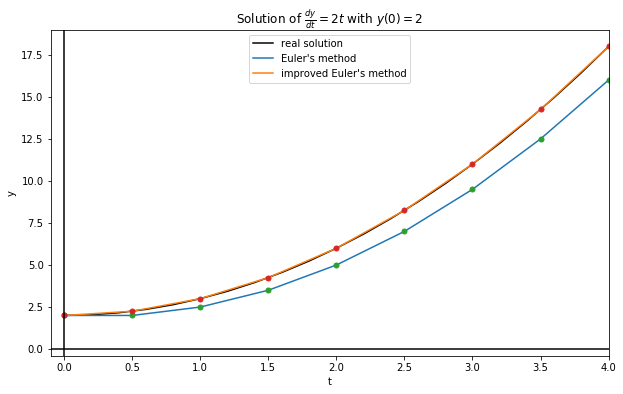

In [250]:
# compute y = 2t
t = np.linspace(0,4,21) # populate t
y = t**2 + 2            # populate f(t)

def diff(t,y):
    return 2*t

# plot and add some visualizations
_, ax18 = plt.subplots(figsize=(10,6))
ax18.plot(t,y,'k')
ax18.set_title(r"Solution of $\frac{dy}{dt} = 2t$ with $y(0)=2$")
ax18.set_xlabel('t')
ax18.set_ylabel('y');
ax18.axis([-0.1,4,-0.4,19]);

# Euler's method
h = 0.5
N = int(4/h)+1
t_em = np.arange(0,4.1,h)
y_em = np.zeros_like(t_em)
y_em[0] = 2
for n in np.arange(1,N):
    t_em[n-1]
    y_em[n] = h*diff(t_em[n-1],y_em[n-1]) + y_em[n-1]
    
# improved Euler's method
t_em2 = np.arange(0,4.1,h)
y_em2 = np.zeros_like(t_em2)
y_em2[0] = 2
for n in np.arange(1,N):
    t_em2[n-1]
    ytmp = h*diff(t_em2[n-1],y_em2[n-1]) + y_em2[n-1]
    y_em2[n] = h/2*(diff(t_em2[n-1],y_em2[n-1])+diff(t_em2[n],ytmp)) + y_em2[n-1]
    
ax18.plot(t_em,y_em)
ax18.plot(t_em2,y_em2)
ax18.plot(t_em,y_em,'.',ms=10);
ax18.plot(t_em2,y_em2,'.',ms=10);
ax18.axhline(y=0, color='k')
ax18.axvline(x=0, color='k');
ax18.legend(("real solution","Euler\'s method","improved Euler\'s method"));

It's clear that the improved Euler's method (plotted in orange) does a much better job at approximating the solution than the original Euler's method (plotted in blue), even at a somewhat large stepsize of $h=0.5$.

If you're curious about the Runge-Kutta method, what it essentially does is take a weighted average of the slopes computed at any number of of points in the interval with greater weights towards slopes in the middle. It is derived using some fancy math known as a *Taylor expansion*. The most common numer of slopes used is four, which is referred to as the *Runge-Kutta Method of Order 4*. 

### Analytical versus numerical solutions

---

## 2. Membrane potential dynamics

The dynamics of the membrane potential of a typical neuron follow

$$
C \dot{V} = (E_\text{leak} - V) \frac{1}{R} + I_\text{input}
$$

where $I_{input}$ is an input current, $V$ is the membrane voltage, $C$ is the membrane capacitance, $E_{leak}$ is a constant (typically about -70 mV), and $R$ is the membrane resistance. For a typical neuron, $RC \approx 20$ ms.




Things to lead into:
1. Fixed points
    - stable fixed point = resting membrane potential
2. Linearization
    - taylor expansion for linear approximation around fixed point
3. Euler's method
    - numerical approximation of solution
    
---

## 3. Exercise: Drift-diffusion model 